In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr        
import json

from IPython.display import display
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator

In [3]:
from plotnine import ggplot, geom_boxplot, aes, stat_smooth, facet_wrap, theme_matplotlib, ylim
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['svg.fonttype'] = 'none'
rcParams['axes.grid'] = True
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.grid.which'] = 'both'
rcParams['grid.color'] = "black"
rcParams['grid.linestyle'] = 'dashed'
rcParams['lines.linewidth'] = 1
rcParams['axes.linewidth'] = 0.5
rcParams['grid.linewidth'] = 0.25
rcParams['grid.alpha'] = 0.5
rcParams['figure.subplot.wspace'] = 0.4
rcParams['figure.subplot.hspace'] = 0.5
rcParams['axes.labelpad'] = 0.5

rcParams['axes.labelsize'] = 11
rcParams['axes.labelweight'] = "normal"
rcParams['axes.titlesize'] = 12
rcParams['axes.titleweight'] = "bold"
rcParams['figure.titlesize'] = 14
rcParams['figure.titleweight'] = "bold"
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 11
rcParams['legend.title_fontsize'] = 12
rcParams['legend.title_fontsize'] = 12

In [4]:
def plot_heatmap(_df, df_info):
    df = _df[_df.columns[6:]]    
    df.columns = range(len(df.columns))
    df = df.reindex(df[list(range(349,449))].mean(axis=1).sort_values(ascending=False).index)
    previous_border = 0
    for b in df_info["sample_boundaries"][1:]:        
        yield df[list(range(previous_border, b))]
        previous_border=b

# Figure 2E

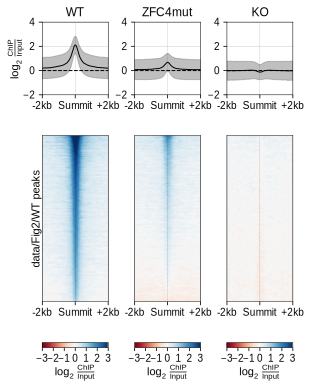

In [5]:
for tfile in ["data/Fig2/WT.SantaCruz.final.summit.250.merged.log2.matrix.gz"]:
    peaks = tfile.split(".")[0]
    label_info = {"WT": "WT", "ZFC12D": "ZFC1-2Δ", "ZFC4M": "ZFC4mut", "KO": "KO"}
    t = pd.read_csv(tfile, sep="\t", comment="@", header=None)
    t_info = json.loads(pd.read_csv(tfile, sep="\t", nrows=1, header=None)[0].values[0][1:])
    fig, (lxes, axes, bxes) = plt.subplots(3, len(t_info["sample_labels"]), figsize=(len(t_info["sample_labels"])*1.5,6), 
                                           gridspec_kw={'height_ratios': (0.35, 0.8, 0.025)})
    for i, l, lx, ax, bx in zip(plot_heatmap(t, t_info), t_info["sample_labels"], lxes, axes, bxes):
        hm = ax.imshow(i.fillna(0).values, interpolation="gaussian", cmap="RdBu", vmin=-3, vmax=3, aspect="auto")
        lx.plot(range(len(i.columns)), i.fillna(0).mean().values, color="black", linewidth=1)
        imean = i.fillna(0).mean().values
        stdmean = sms.DescrStatsW(i.fillna(0).values).std   
        lx.fill_between(list(range(len(i.columns))), imean+stdmean, imean-stdmean, color="grey", alpha=0.5)
        lx.set_title(label_info[l.split(".")[0]], fontweight="normal")
        lx.set_ylim(-2, 4)
        lx.axhline(y=0, linestyle="dashed", color="black", linewidth=1)
        lx.set_xlim(0,799)
        lx.set_xticks([0,399,799])
        lx.set_xticklabels(["-2kb", "Summit", "+2kb"])
        fig.colorbar(hm, cax=bx, orientation="horizontal", ticks=[-3,-2,-1,0,1,2,3])
        bx.set_xlabel(r"$\mathregular{log_2}$ " r"$\mathregular{\frac{ChIP}{Input}}$")
        ax.set_xticks([0, 399, 799])
        ax.set_xticklabels(["-2kb", "Summit", "+2kb"])
        ax.set_yticks([])
    lxes[0].set_ylabel(r"$\mathregular{log_2}$ " r"$\mathregular{\frac{ChIP}{Input}}$")
    axes[0].set_ylabel("{} peaks".format(peaks))

# Figure S2F

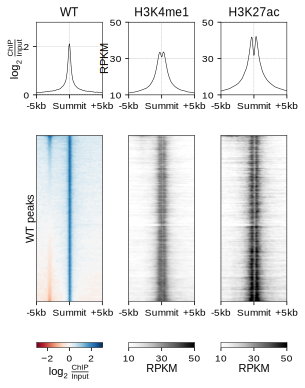

In [6]:
for tfile in ["data/Fig2/WT.SantaCruz.peaks.merged.enhancers.matrix.gz"]:
    peaks = tfile.split(".")[0]
    label_info = {"WT": "WT", 
                  "GSM2417096_ESC_H3K27ac": "H3K27ac", 
                  "GSM2417100_ESC_H3K27me3": "H3K27me3", 
                  "GSM2417088_ESC_H3K4me1": "H3K4me1"}
    t = pd.read_csv(tfile, sep="\t", comment="@", header=None)
    t_info = json.loads(pd.read_csv(tfile, sep="\t", nrows=1, header=None)[0].values[0][1:])
    fig, (lxes, axes, bxes) = plt.subplots(3, len(t_info["sample_labels"])-1, figsize=((len(t_info["sample_labels"])-1)*1.5,6), 
                                           gridspec_kw={'height_ratios': (0.35, 0.8, 0.025)})
    for i, l, lx, ax, bx, ylim, zlim, cmap, cmapticks in zip(plot_heatmap(t, t_info), t_info["sample_labels"], lxes, axes, bxes, 
                                           [(0, 3), (10, 50), (10, 50), (3, 7)],
                                           [(-3, 3), (10, 50), (10, 50), (3, 11)], 
                                           ["RdBu", "Greys", "Greys", "Greens"],
                                           [[-2, 0, 2],[10,30,50], [10,30,50],[3,5,7,9,11]]):
        hm = ax.imshow(i.fillna(0).values, interpolation="gaussian", cmap=cmap, vmin=zlim[0], vmax=zlim[1], aspect="auto")
        lx.plot(range(len(i.columns)), i.fillna(0).mean().values, color="black", linewidth=0.5)
        imean = i.fillna(0).mean().values
        lx.set_title(label_info[l.split(".")[0]], fontweight="normal")
        lx.set_ylim(ylim[0], ylim[1])
        lx.axhline(y=0, linestyle="dashed", color="black", linewidth=0.5)
        lx.set_xlim(0,2000)
        lx.set_xticks([0,1000,2000])
        if cmapticks == [-2, 0, 2]:
            lx.set_yticks([0, 2])
        else:
            lx.set_yticks(cmapticks)
        lx.set_xticklabels(["-5kb", "Summit", "+5kb"])
        fig.colorbar(hm, cax=bx, orientation="horizontal", ticks=cmapticks)
        bx.set_xlabel(r"$\mathregular{log_2}$ " r"$\mathregular{\frac{ChIP}{Input}}$")
        ax.set_xlim(0,2000)
        ax.set_xticks([0,1000,2000])
        ax.set_xticklabels(["-5kb", "Summit", "+5kb"])
        ax.set_yticks([])
    lxes[0].set_ylabel(r"$\mathregular{log_2}$ " r"$\mathregular{\frac{ChIP}{Input}}$")
    axes[0].set_ylabel("WT peaks")
    lxes[1].set_ylabel("RPKM")
    bxes[1].set_xlabel("RPKM")
    bxes[2].set_xlabel("RPKM")

# Figure 2D, 2F, S2E

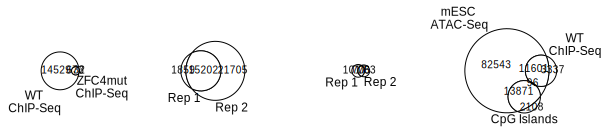

In [7]:
from matplotlib_venn import venn3_circles, venn3, venn2
def set_venn_scale(ax, true_area, reference_area):
    s = np.sqrt(float(reference_area)/true_area)
    ax.set_xlim(-s, s)
    ax.set_ylim(-s, s)
    
fig, (bx, cx, dx, ax) = plt.subplots(1, 4, figsize=(10,2.5))

c = venn2(subsets=(14529, 32, 673),
      set_labels=("WT\nChIP-Seq", "ZFC4mut\nChIP-Seq"),
      ax=bx)
for i, j in zip(["10", "01", "11"], 
                ["white", "white", "white"]):
    c.get_patch_by_id(i).set_color(j)
    c.get_patch_by_id(i).set_edgecolor('black')
    c.get_patch_by_id(i).set_linewidth(1)    
    c.get_patch_by_id(i).set_alpha(1.0)
for cc in c.set_labels:
    cc.set_multialignment("center")
num_2 = 0
for cc in (14529, 32, 673):
    num_2 += cc

c = venn2(subsets=(1859, 21705, 15202),
      set_labels=("Rep 1", "Rep 2"),
      ax=cx)
for i, j in zip(["10", "01", "11"], 
                ["white", "white", "white"]
#                 ["#636363", "#9e9ac8", "#fb6a4a", "#fb6a4a", "#74c476", "#74c476", "#9e9ac8"]
               ):
    c.get_patch_by_id(i).set_color(j)
    c.get_patch_by_id(i).set_edgecolor('black')
    c.get_patch_by_id(i).set_linewidth(1)    
    c.get_patch_by_id(i).set_alpha(1.0)
for cc in c.set_labels:
    cc.set_multialignment("center")
num_3 = 0
for cc in (1859, 21705, 15202):
    num_3 += cc

c = venn2(subsets=(1017, 783, 706),
      set_labels=("Rep 1", "Rep 2"),
      ax=dx)
for i, j in zip(["10", "01", "11"], 
                ["white", "white", "white"]
#                 ["#636363", "#9e9ac8", "#fb6a4a", "#fb6a4a", "#74c476", "#74c476", "#9e9ac8"]
               ):
    c.get_patch_by_id(i).set_color(j)
    c.get_patch_by_id(i).set_edgecolor('black')
    c.get_patch_by_id(i).set_linewidth(1)    
    c.get_patch_by_id(i).set_alpha(1.0)
for cc in c.set_labels:
    cc.set_multialignment("center")
num_4 = 0
for cc in (1017, 783, 706):
    num_4 += cc
    
c = venn3(subsets=(82543, 3337, 11601, 2108, 13871, 0, 96),
      set_labels=("mESC\nATAC-Seq", "WT\nChIP-Seq", "CpG Islands"),
      ax=ax)
for i, j in zip(["100", "010", "001", "101", "111",  "110"], 
                ["white", "white", "white", "white", "white", "white", "white"]):
    c.get_patch_by_id(i).set_color(j)
    c.get_patch_by_id(i).set_edgecolor('black')
    c.get_patch_by_id(i).set_linewidth(1)    
    c.get_patch_by_id(i).set_alpha(1.0)
for cc in c.set_labels:
    cc.set_multialignment("center")
num_5 = 0
for cc in (82543, 3337, 11601, 2108, 13871, 0, 96):
    num_5 += cc
    
max_area = max([num_2, num_3, num_4])
for a, d in zip([bx, cx,  dx], [num_2, num_3, num_4,]):
    set_venn_scale(a, d, max_area)

# Figure 2H

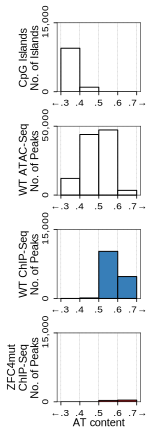

In [8]:
df = pd.read_csv("data/Fig2/peaks_at_content.tsv", sep="\t", index_col=0).drop(["Input\nChromatin", "Genomic"], axis=1)
fig, axes = plt.subplots(4, 1, figsize=(1.5,7))
for i, ax, ylim, c, yticks, title, ylabel in zip(df.columns, axes, [(0,15000), (0,50000), (0,15000), (0,15000)], ["white", "white", "#377eb8", "#e41a1c"],
                         [[0,15000],[0,50000],[0,15000],[0,15000]],
                         ["CpG Islands", "WT ATAC-Seq", "WT ChIP-Seq", "ZFC4mut\nChIP-Seq"],
                         ["No. of Islands", "No. of Peaks", "No. of Peaks", "No. of Peaks", "No. of Peaks"]):
    ax.bar(range(len(df)), df[i].values, color=c, edgecolor="black", width=1, linewidth=1)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_yticklabels(["{:,}".format(yt) for yt in yticks], rotation=90, va="center")
    ax.set_xticks([-0.5,0.5,1.5,2.5,3.5])
    ax.set_xticklabels(["←.3",".4",".5",".6",".7→"])
    ax.set_xlabel("")
    ax.set_ylabel("{}\n{}".format(title, ylabel))
_ = axes[-1].set_xlabel("AT content")

# Figure S2C

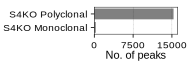

In [9]:
ko_peaks = pd.DataFrame(pd.Series({'S4KO Polyclonal': 15317, 'S4KO Monoclonal': 280})).reset_index()
ko_peaks.columns = ["sample", "peaks"]
ko_peaks
fig, ax = plt.subplots(figsize=(1.5,0.5))
sns.barplot(data=ko_peaks, y="sample", x="peaks", orient="h", ax=ax, color="grey")
ax.set_xlabel("No. of peaks")
ax.set_ylabel("")
_ = ax.set_xticks([0, 7500, 15000])

# Figure S2D

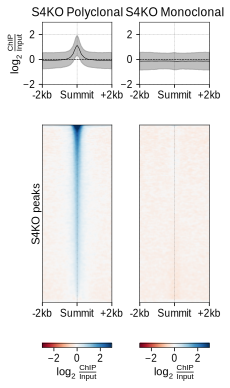

In [10]:
for tfile in ["data/Fig2/KO_Abcam_merged_peaks.matrix.gz"]:
    peaks = tfile.split(".")[0]
    label_info = {"WT.Abcam.log2": "WT Polyclonal", "WT.SantaCruz.log2": "WT Monoclonal", "ZFC12D": "ZFC1-2Δ", 
                  "ZFC4M": "ZFC4mut", "KO.Abcam.log2": "S4KO Polyclonal", "KO.SantaCruz.log2": "S4KO Monoclonal"}
    t = pd.read_csv(tfile, sep="\t", comment="@", header=None)
    t_info = json.loads(pd.read_csv(tfile, sep="\t", nrows=1, header=None)[0].values[0][1:])
    fig, (lxes, axes, bxes) = plt.subplots(3, len(t_info["sample_labels"]), figsize=(len(t_info["sample_labels"])*1.5,6), 
                                           gridspec_kw={'height_ratios': (0.35, 1, 0.025)})
    for i, l, lx, ax, bx in zip(plot_heatmap(t, t_info), t_info["sample_labels"], lxes, axes, bxes):
        hm = ax.imshow(i.fillna(0).values, interpolation="gaussian", cmap="RdBu", vmin=-3, vmax=3, aspect="auto")
        lx.plot(range(len(i.columns)), i.fillna(0).mean().values, color="black", linewidth=0.5)
        imean = i.fillna(0).mean().values
        stdmean = sms.DescrStatsW(i.fillna(0).values).std   
#         up, down = st.t.interval(0.95, len(i.columns), loc=np.mean(i.fillna(0).values), scale=st.sem(i.fillna(0).values))
        lx.fill_between(list(range(len(i.columns))), imean+stdmean, imean-stdmean, color="grey", alpha=0.5)
        lx.set_title(label_info[l], fontweight="normal")
        lx.set_ylim(-2, 3)
        lx.set_yticks([-2, 0, 2])
        lx.axhline(y=0, linestyle="dashed", color="black", linewidth=0.5)
        lx.set_xlim(0,799)
        lx.set_xticks([0,399,799])
        lx.set_xticklabels(["-2kb", "Summit", "+2kb"])
        fig.colorbar(hm, cax=bx, orientation="horizontal", ticks=[-2,0,2])
        bx.set_xlabel(r"$\mathregular{log_2}$ " r"$\mathregular{\frac{ChIP}{Input}}$")
        ax.set_xticks([0, 399, 799])
        ax.set_xticklabels(["-2kb", "Summit", "+2kb"])        
        ax.set_yticks([])
    lxes[0].set_ylabel(r"$\mathregular{log_2}$ " r"$\mathregular{\frac{ChIP}{Input}}$")
    axes[0].set_ylabel("S4KO peaks".format(peaks))    

# R Script to generate top motifs

```R
library(Logolas)
library(universalmotif)
library(svglite)
files <- list.files(path="top_motif/", pattern="*.tsv", 
                    full.names=TRUE, recursive=FALSE)
lapply(files, function(x) {
  t <- read.table(x, sep="\t", check.names=FALSE, row.names=1,
                  header=TRUE) # load file
  tt <- motif_rc(read_matrix(x, sep="\t", rownames=TRUE))
  
  bg = c(0.32078681018555705, 0.23702305406056712, 0.2645935416499317, 0.1775965941039441)
  names(bg) = c('T', 'C', 'A', 'G')
  
  
  png(gsub("tsv", "png", x), pointsize=14)
  logomaker(tt["motif"], type="EDLogo", bg=bg, colors = c( "#AC9D93", "#D40000", "#FF8080", "#AC9D93"))
  dev.off()
  
})
```

# Figure S2A

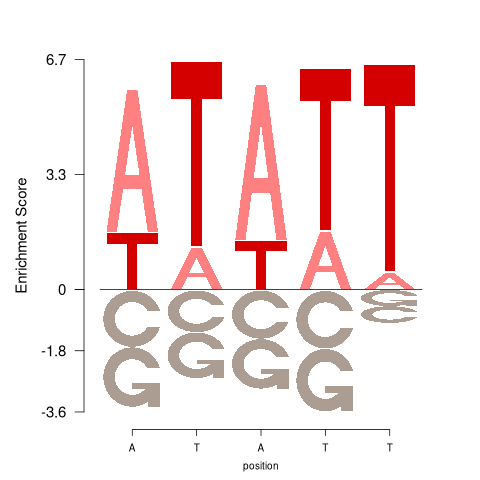

In [11]:
from IPython.display import Image
Image("data/Fig2/top_motif/5_AATAT.png")

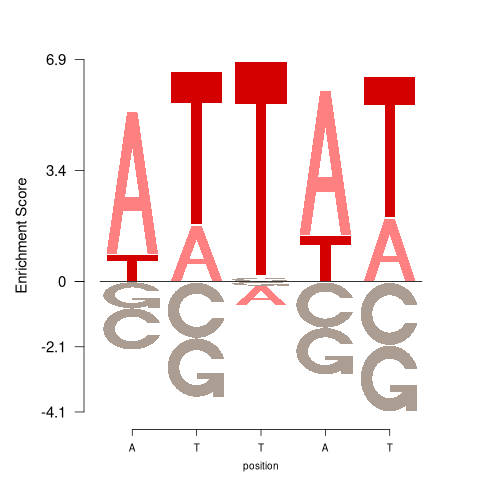

In [12]:
Image("data/Fig2/top_motif/5_ATAAT.png")

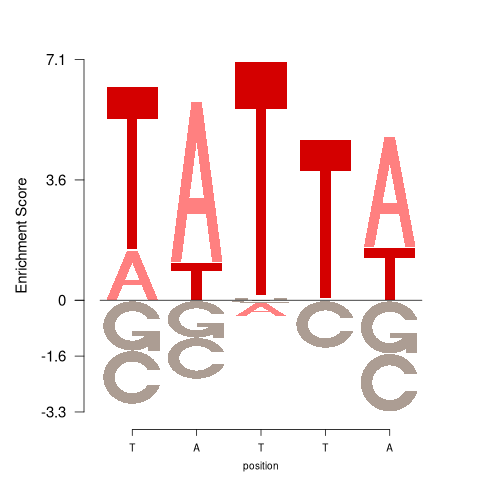

In [13]:
Image("data/Fig2/top_motif/5_TAATA.png")

In [14]:
def at(x):
    at_count = 0
    for i in x:
        if i == "A" or i == "T":
            at_count += 1
    return at_count/len(x)

In [15]:
import glob
from collections import defaultdict
from tqdm import tqdm
at_content = defaultdict(list)
for i in tqdm(glob.glob("data/Fig2/selex/*.txt")):
    with open(i) as iH:
        for ii in iH.readlines():
            at_content[i.split("/")[-1].split(".")[0]].append(at(ii))

100%|██████████| 39/39 [00:03<00:00, 12.51it/s]


# Figure 2A

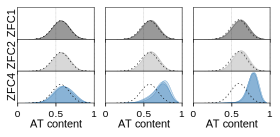

In [16]:
selex_info = pd.read_csv("data/Fig2/selex/SELEX_info.tsv", sep="\t", index_col=7)
selex_info["ZFC"] = selex_info["FileName"].apply(lambda x: x.split("-")[0])
selex_info.head()

fig, axes = plt.subplots(3, 3, figsize=(4,2), sharex=True, sharey=True)
for (i, j), c, axx in zip(selex_info[selex_info["ZFC"]!="None"].groupby("ZFC"), ["#525252", "#bdbdbd", "#377eb8"], [axes[0], axes[1], axes[2]]):
    axx[0].set_ylabel(i)
    for (k, l), (m, n), ax in zip(j.groupby("cycle"), selex_info[selex_info["ZFC"]=="None"].groupby("cycle"), axx):
        for o in l.index: sns.kdeplot(data=at_content[o], ax=ax, cut=0, shade=True, linewidth=0.25, bw_adjust=3, color=c)        
        for p in n.index: sns.kdeplot(data=at_content[p], ax=ax, cut=0, shade=False, linewidth=0.25, bw_adjust=3,
                                      color="black", linestyle=(0, (5, 10)))
        ax.set_xticks([0, 0.5, 1])
        ax.set_xticklabels(["0", "0.5", "1"])
        ax.set_yticks([])      
axes[0][0].set_xlim(0, 1)
for ax in axes[2]:
    ax.set_xlabel("AT content")
fig.tight_layout()
fig.subplots_adjust(wspace=0.15, hspace=0)

In [17]:
exp_info = pd.read_csv("data/Fig2/selex/SELEX_info.tsv", sep="\t", index_col=7)["FileName"].to_dict()
zfc1_info = {}
zfc2_info = {}
zfc4_info = {}
pcr_info = {}
for k, l in zip(["ZFC1", "ZFC2", "ZFC4", "None"], [zfc1_info, zfc2_info, zfc4_info, pcr_info]):
    for m in ["lib1", "lib2", "lib3"]:
        for i, j in exp_info.items():    
            if j.endswith("_6") and j.startswith(k) and m in j:
                for ii, jj in exp_info.items():
                    if m in jj and (jj.endswith("_0") or jj.startswith(k)):
                        l[ii] = i

In [18]:
def rand_jitter(arr, stdev=.15):    
    return arr + np.random.randn(len(arr)) * stdev
def populate_score_df(filename):
    df = pd.read_csv(filename, sep="\t")
    pcr_cycle_dict = {0:0, 1:1, 3:2, 6:3}
    df["pcr_cycle"] =  df["sample_info"].apply(lambda x: pcr_cycle_dict[int(x.split("_")[-1])])    
    df["replicate"] = df["sample_info"].apply(lambda x: int(x.split("_")[0][-1]))
    df["at_content"] = df["motif"].apply(at)
    mean_df = df.groupby(["pcr_cycle", "motif"]).mean().reset_index()
    std_df = df.groupby(["pcr_cycle", "motif"]).std().reset_index()    
    mean_df["std_fraction"] = std_df["fraction"]
    mean_df["std_fuzzy_fraction"] = std_df["fuzzy_fraction"]
    return mean_df
def gc(x):
    gc_count = 0
    for i in x:
        if i == "G" or i == "C":
            gc_count += 1
    return gc_count
def at(x):
    at_count = 0
    for i in x:
        if i == "A" or i == "T":
            at_count += 1
    return at_count

In [19]:
def tatamer(x):
    if "TATA" in x:
        return True
    else:
        return False
def at_group(x, ys):
    for y in ys:
        if x <= y:
            return y

# Figure 2C

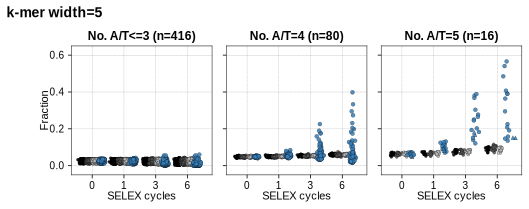

In [20]:
for width, groups, lims in zip([5],[[3,4,5],[8,9,10]],[(-0.05, 0.65), (-0.005, 0.055)]):
    dfs = []
    for fragment, fragment_dict in zip(["ZFC4", "ZFC1", "ZFC2", "None"], [zfc4_info, zfc1_info, zfc2_info, pcr_info]):
        df = populate_score_df("data/Fig2/selex/{}.{}.score.tsv".format(width, fragment))
        df["ZFC"] = fragment
        dfs.append(df)
    df = pd.concat(dfs)
    df["at_group"] = df["at_content"].apply(lambda x: at_group(x, groups))    
    df["tatamer"] = df["motif"].apply(lambda x: tatamer(x))
    fig, axes = plt.subplots(1, 3, figsize=(7, 3), sharex=True, sharey=True, gridspec_kw={'width_ratios': (1,1,1)})
    for ax, (i, j) in zip(axes.flatten(), df.groupby("at_group")):
        xlocation=0        
        for k, l in j.groupby("pcr_cycle"):            
            for (m, _n), c, ms in zip(l.groupby("ZFC"), ["black", "#525252", "#bdbdbd", "#377eb8"], [3,3,3,4]):
                if i == 5 and m == "ZFC4":
                    n = _n[(_n["tatamer"]==False)]
                    ax.errorbar(rand_jitter([xlocation]*len(n), stdev=.25), n["fraction"].values, fmt="o",
                                ecolor="black",
                                c=c, ms=ms, markeredgecolor="black", alpha=0.85, markeredgewidth=0.25, zorder=0)
                    if k==3:
                        n = _n[_n["tatamer"]==True]                    
                        ax.errorbar(rand_jitter([xlocation+1]*len(n), stdev=.25), n["fraction"].values, fmt="^",
                                    c=c, ms=4, markeredgecolor="black", alpha=0.85, zorder=10, markeredgewidth=0.25)
                    else:
                        n = _n[_n["tatamer"]==True]                    
                        ax.errorbar(rand_jitter([xlocation]*len(n), stdev=.25), n["fraction"].values, fmt="^",
                                    c=c, ms=4, markeredgecolor="black", alpha=0.85, zorder=10, markeredgewidth=0.25)
                else:
                    ax.errorbar(rand_jitter([xlocation]*len(_n), stdev=.2), _n["fraction"].values, fmt="o",
                                 ecolor="black",
                                c=c, ms=ms, markeredgecolor="black", alpha=0.85, markeredgewidth=0.25, zorder=0)
                xlocation += 1
            xlocation += 1
    for i, j in zip(axes, ["No. A/T<={} (n={:,})".format(groups[0], len(df[(df["at_group"]==groups[0]) & (df["ZFC"]=="ZFC4") & (df["pcr_cycle"]==3)])),
                  "No. A/T={} (n={:,})".format(groups[1], len(df[(df["at_group"]==groups[1]) & (df["ZFC"]=="ZFC4") & (df["pcr_cycle"]==3)])),
                  "No. A/T={} (n={:,})".format(groups[2], len(df[(df["at_group"]==groups[2]) & (df["ZFC"]=="ZFC4") & (df["pcr_cycle"]==3)]))]):
        i.set_title(j)
        i.set_xlabel("SELEX cycles")
    axes[0].set_ylabel("Fraction")
    ax.set_xticks([1.5, 6.5, 11.5, 16.5])
    ax.set_xticklabels([0, 1, 3, 6])    
    ax.set_ylim(lims)
    fig.subplots_adjust(wspace=0.1)
    fig.suptitle("k-mer width={}".format(width), x=0.05, y=0.95, fontsize=14, fontweight="bold")
    fig.tight_layout()

In [21]:
from sinfo import sinfo
sinfo()

-----
matplotlib          3.3.2
matplotlib_venn     NA
numpy               1.19.2
pandas              1.1.3
plotnine            0.6.0
scipy               1.5.2
seaborn             0.11.0
sinfo               0.3.1
sklearn             0.23.2
statsmodels         0.12.0
tqdm                4.50.2
-----
IPython             7.18.1
jupyter_client      6.1.7
jupyter_core        4.6.3
jupyterlab          2.2.8
notebook            6.1.4
-----
Python 3.8.6 (default, Sep 30 2020, 04:00:38) [GCC 10.2.0]
Linux-5.4.71-1-lts-x86_64-with-glibc2.2.5
4 logical CPU cores
-----
Session information updated at 2020-10-18 21:50
